In [ ]:
!python -m pip install prophet

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

In [ ]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
df['cap'] = 8.5


In [ ]:
# Python
m = Prophet(growth='logistic')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/q7tyke9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/9ui8rbpq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10671', 'data', 'file=/tmp/tmpz680pjwd/q7tyke9p.json', 'init=/tmp/tmpz680pjwd/9ui8rbpq.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_model8x02p6gl/prophet_model-20240506042756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:27:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


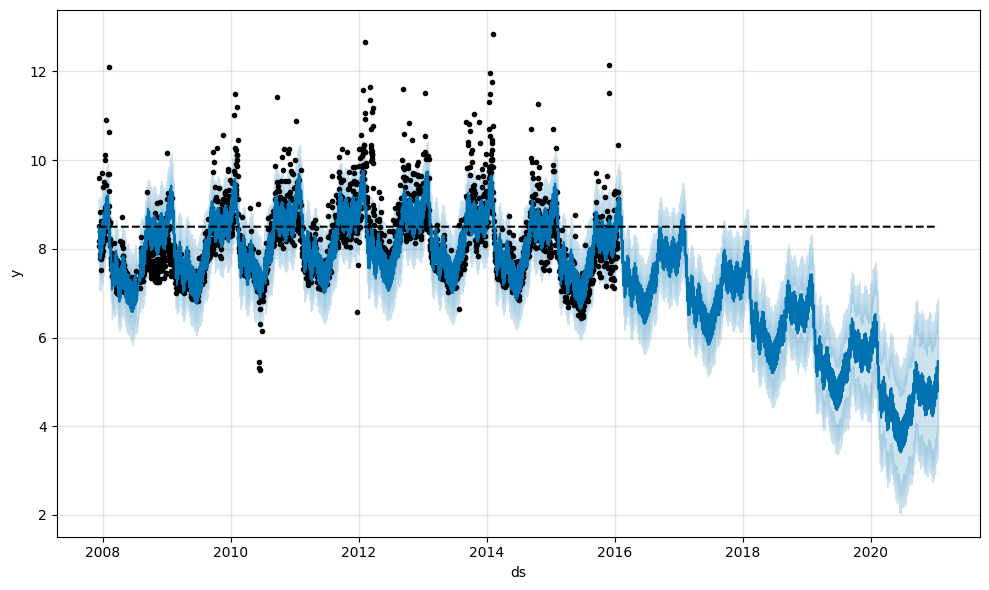

In [ ]:
# Python
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/ku1je9eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/s9hnka1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4514', 'data', 'file=/tmp/tmpz680pjwd/ku1je9eb.json', 'init=/tmp/tmpz680pjwd/s9hnka1u.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_modelhugdpi6a/prophet_model-20240506042821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


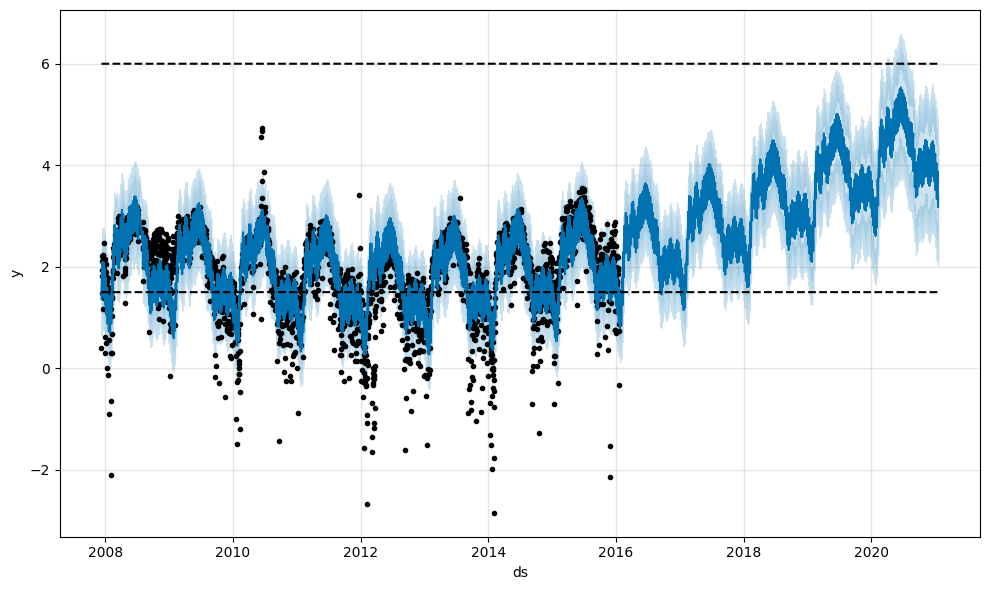

In [ ]:
# Python
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [ ]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/92qtf2o2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/3un9ac7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61149', 'data', 'file=/tmp/tmpz680pjwd/92qtf2o2.json', 'init=/tmp/tmpz680pjwd/3un9ac7e.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_model42b38ytt/prophet_model-20240506042851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,-1.217337,-1.295465
2191,2014-02-03,-1.905867,-1.545798
2532,2015-01-11,-1.217337,0.000000
2533,2015-01-12,-1.905867,0.000000
2901,2016-01-17,-1.217337,0.000000
2902,2016-01-18,-1.905867,0.000000
2908,2016-01-24,-1.217337,0.000000
2909,2016-01-25,-1.905867,0.000000
2922,2016-02-07,-1.217337,-1.295465
2923,2016-02-08,-1.905867,-1.545798


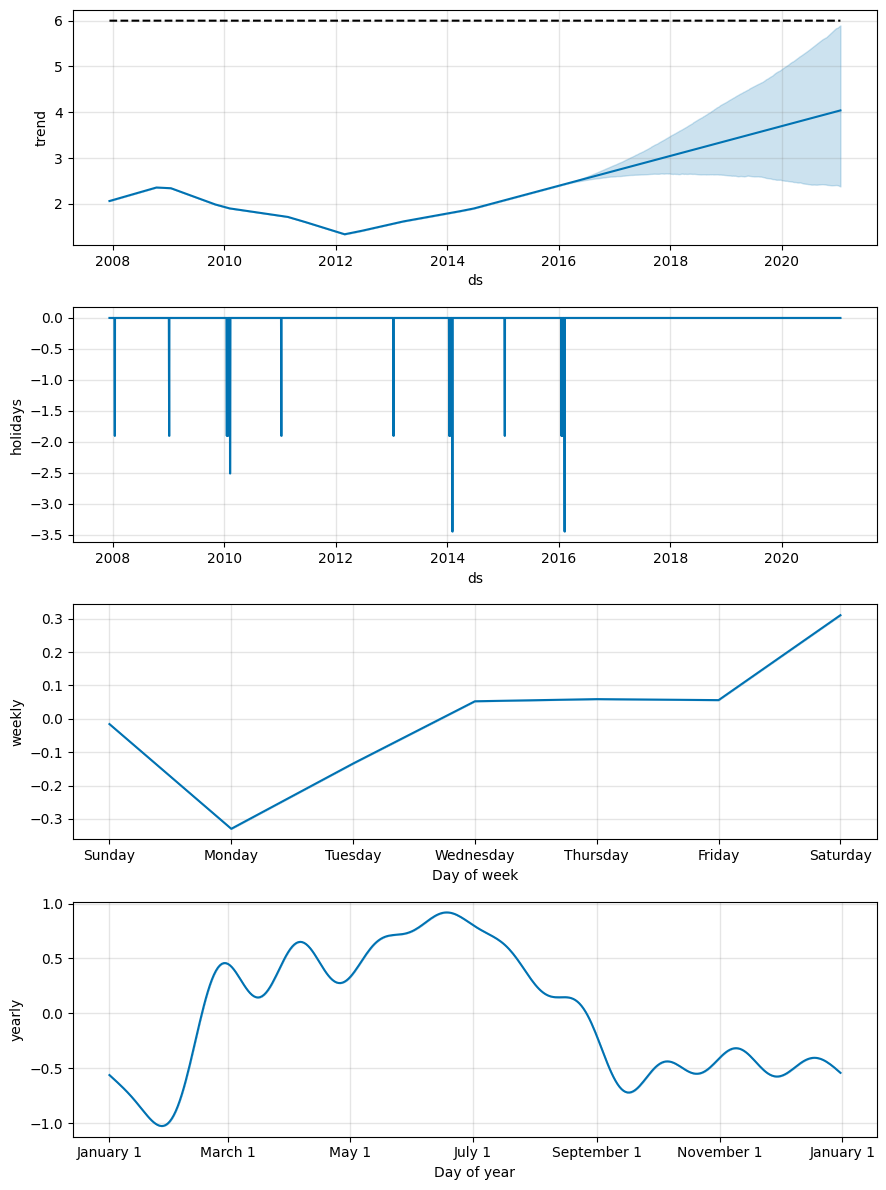

In [ ]:
# Python
fig = m.plot_components(forecast)


In [ ]:
# Python
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/wp1jg9kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/4yw3tsey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80252', 'data', 'file=/tmp/tmpz680pjwd/wp1jg9kg.json', 'init=/tmp/tmpz680pjwd/4yw3tsey.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_model68k4rw_z/prophet_model-20240506042855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
m.train_holiday_names


0                         playoff
1                       superbowl
2                  New Year's Day
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Veterans Day
7                    Thanksgiving
8                   Christmas Day
9        Christmas Day (observed)
10     Martin Luther King Jr. Day
11          Washington's Birthday
12                   Columbus Day
13        Veterans Day (observed)
14    Independence Day (observed)
15      New Year's Day (observed)
dtype: object

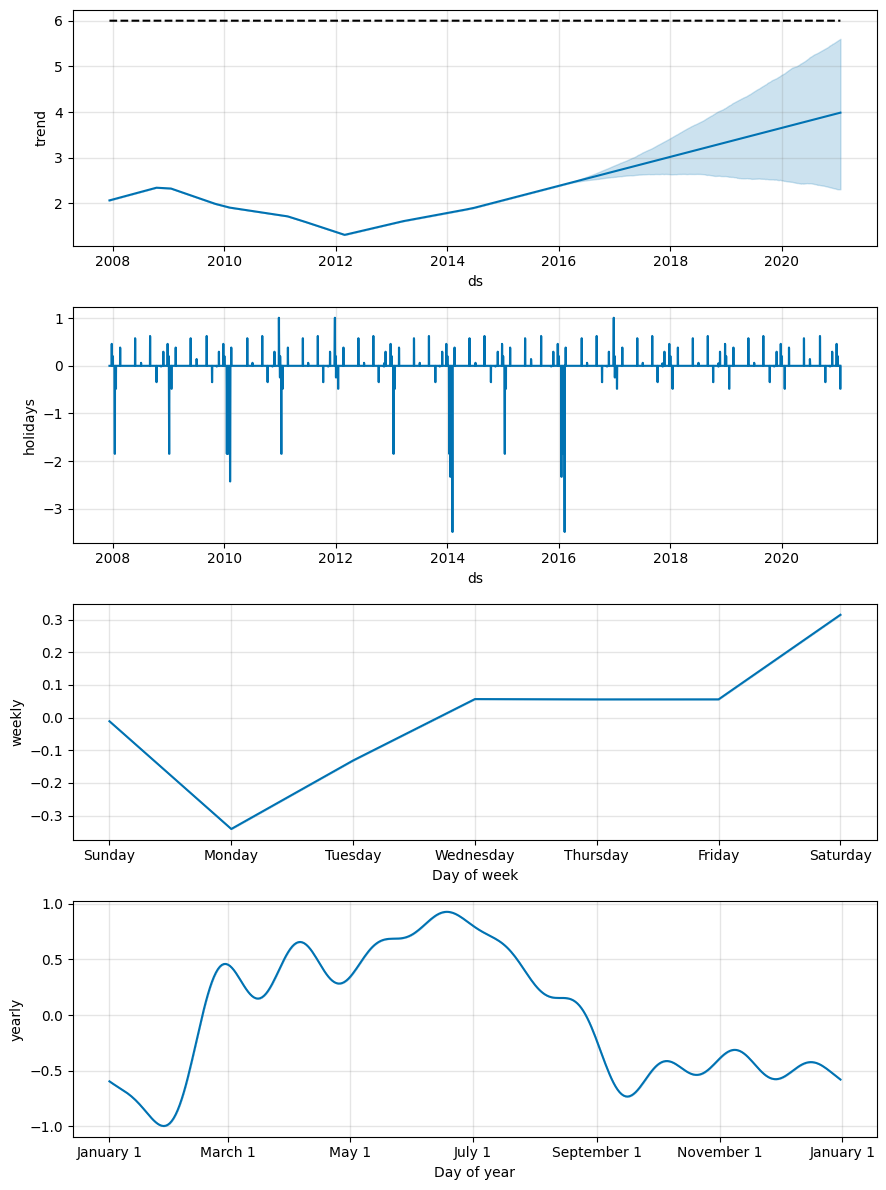

In [ ]:
# Python
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [ ]:
# Python
from prophet.make_holidays import make_holidays_df

nsw_holidays = make_holidays_df(
    year_list=[2019 + i for i in range(10)], country='AU', province='NSW'
)
nsw_holidays.head(n=10)

,ds,holiday
0,2019-04-19,Good Friday
1,2019-04-22,Easter Monday
2,2019-01-01,New Year's Day
3,2019-01-28,Australia Day
4,2019-04-20,Easter Saturday
5,2019-04-21,Easter Sunday
6,2019-04-25,ANZAC Day
7,2019-10-07,Labour Day
8,2019-06-10,Queen's Birthday
9,2019-12-25,Christmas Day


In [ ]:
# Python
from prophet import Prophet

m_nsw = Prophet(holidays=nsw_holidays)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/lxdjo0uo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/5p6k4fml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25234', 'data', 'file=/tmp/tmpz680pjwd/lxdjo0uo.json', 'init=/tmp/tmpz680pjwd/5p6k4fml.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_modelc7o4ywbg/prophet_model-20240506042859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


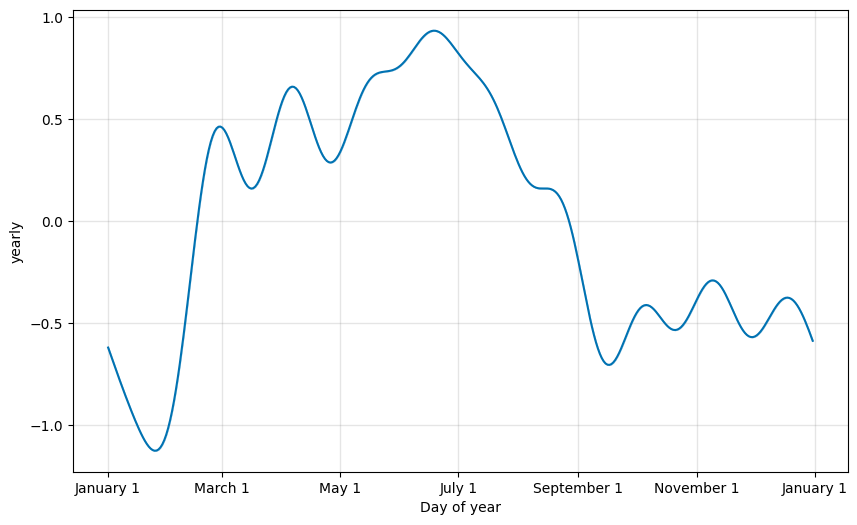

In [ ]:
# Python
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/bb1ehhjp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/5nym8w8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17410', 'data', 'file=/tmp/tmpz680pjwd/bb1ehhjp.json', 'init=/tmp/tmpz680pjwd/5nym8w8e.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_modell5zlmfz_/prophet_model-20240506042900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


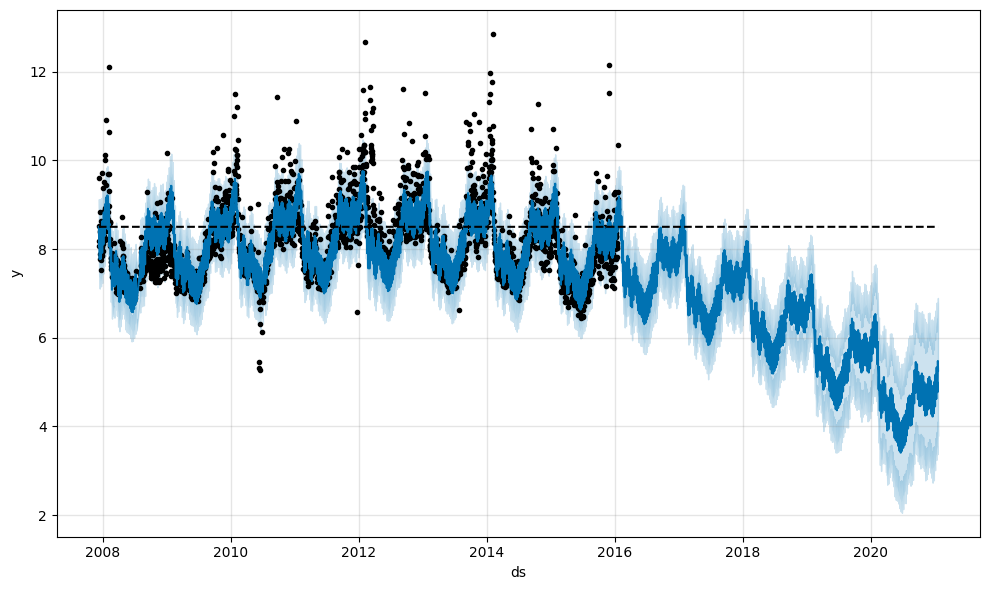

In [ ]:
import pandas as pd
from prophet import Prophet

# Read the data
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# Add a 'cap' column to the DataFrame with the capacity values
df['cap'] = 8.5  # Assuming a capacity value of 8.5

# Initialize the Prophet model with growth='logistic'
m = Prophet(growth='logistic')

# Fit the model to the data
m.fit(df)

# Generate future dates for forecasting
future = m.make_future_dataframe(periods=1826)

# Set the 'cap' column in the future dataframe
future['cap'] = 8.5

# Make predictions
fcst = m.predict(future)

# Plot the forecast
fig = m.plot(fcst)


INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/oalidu9o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/ugh73n5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88911', 'data', 'file=/tmp/tmpz680pjwd/oalidu9o.json', 'init=/tmp/tmpz680pjwd/ugh73n5r.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_modelivj9ydzu/prophet_model-20240506042916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'we

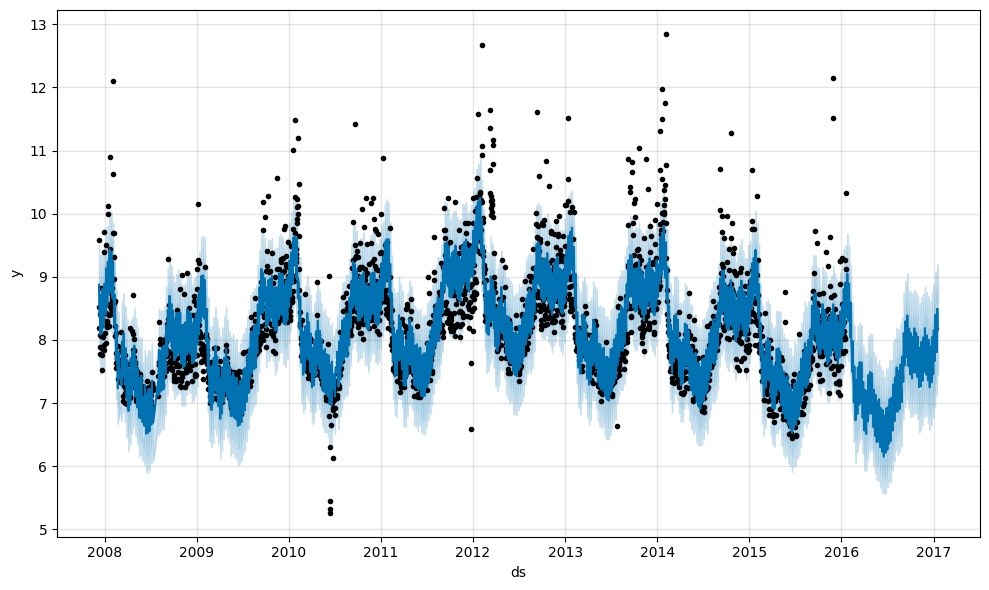

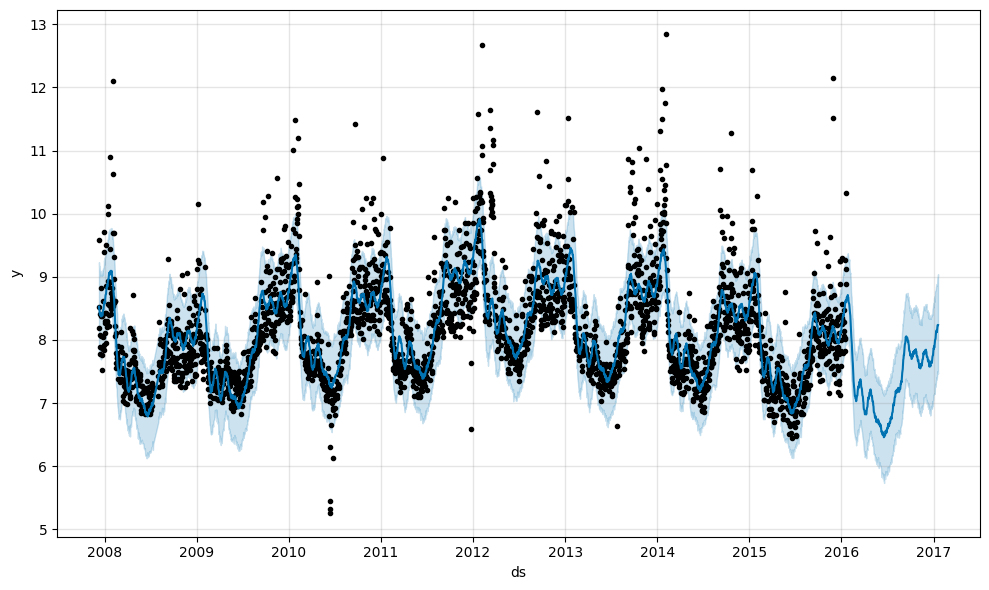

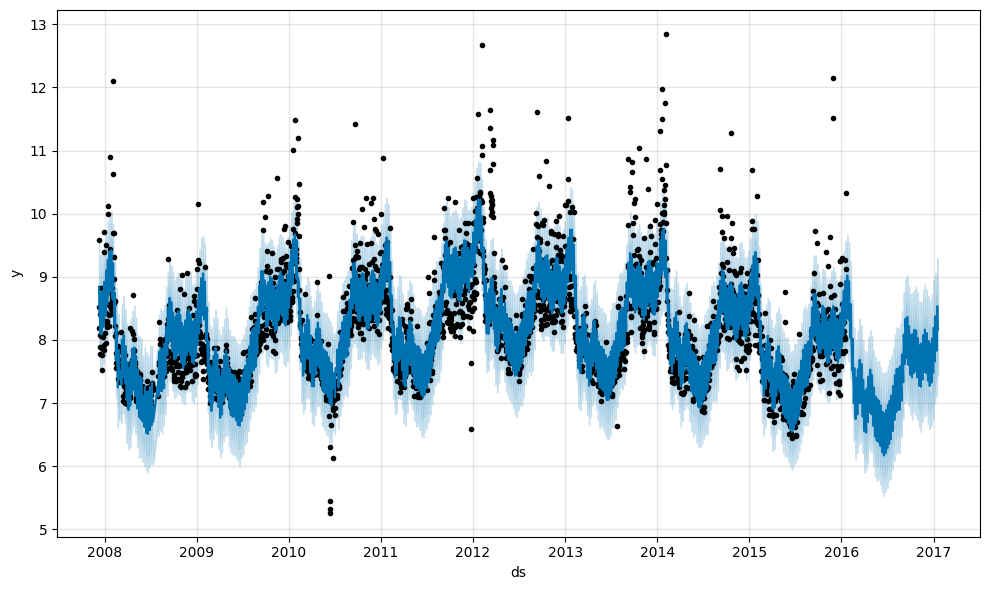

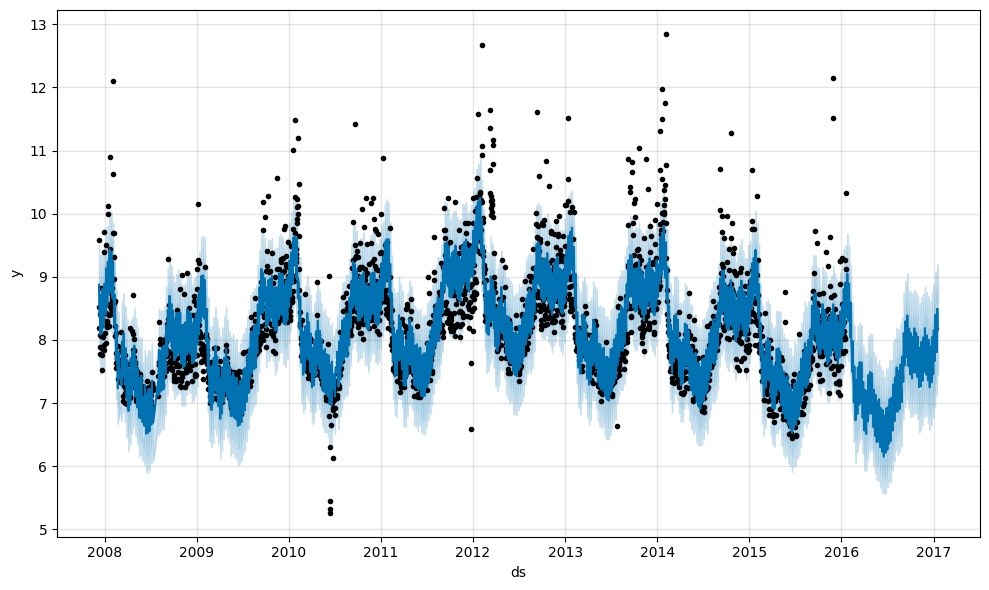

In [ ]:
# Test it with various values for ‘period’ and ‘fourier_order’.

# Add manual seasonality with a period of 10 days and Fourier order of 5
m = Prophet()
m.add_seasonality(name='weekly', period=10, fourier_order=5)
m.fit(df)

# Make a future dataframe and predict
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

# Plot the forecast
m.plot(forecast)

# Try different values for period and fourier_order
m = Prophet()
m.add_seasonality(name='weekly', period=7, fourier_order=3)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

# Try different values for period and fourier_order
m = Prophet()
m.add_seasonality(name='weekly', period=14, fourier_order=7)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/cafo7xrn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/a89jmpv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56430', 'data', 'file=/tmp/tmpz680pjwd/cafo7xrn.json', 'init=/tmp/tmpz680pjwd/a89jmpv8.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_modelr77f2thj/prophet_model-20240506042924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


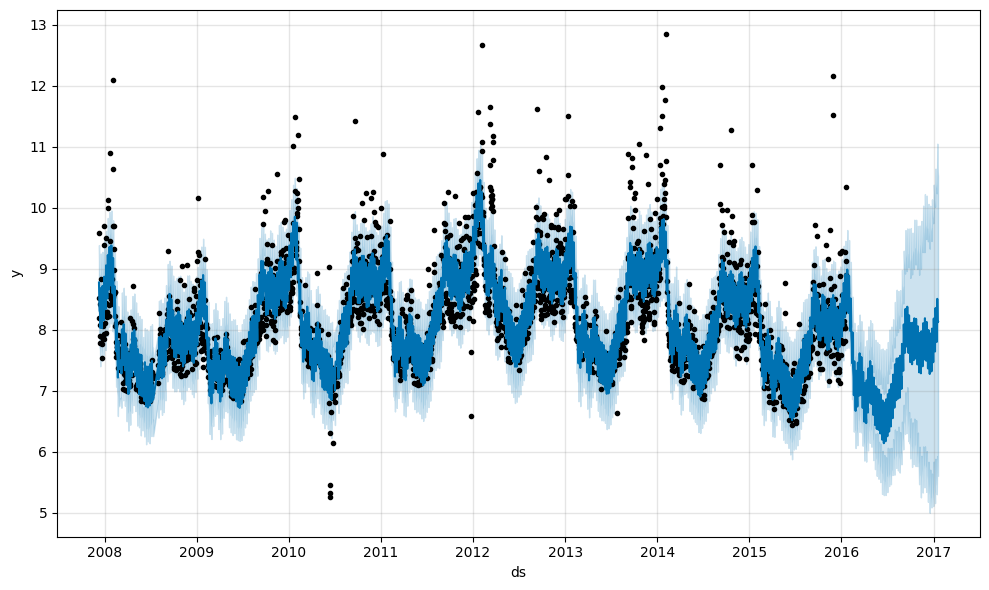

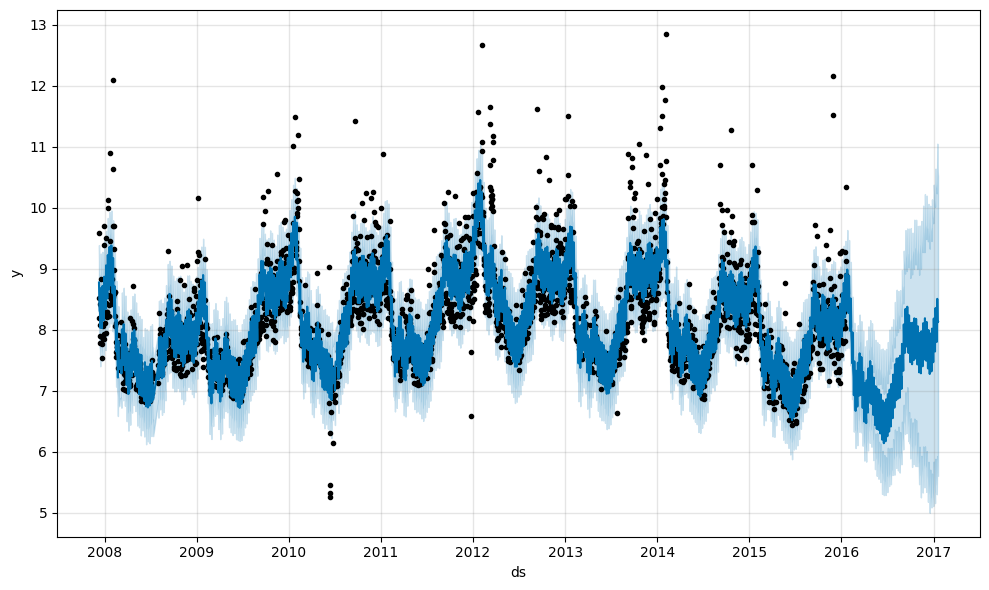

In [ ]:
# Tune the ‘n_changepoints’ and
# ‘changepoit_prior_scale’ arguments/parameters.

# Python
m = Prophet(
    n_changepoints=25,
    changepoint_prior_scale=0.5,
)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)


In [ ]:
import pandas as pd
from prophet import Prophet

# Read the data
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# Initialize an empty dictionary to store models and their predictions
models = {}

# Model 1
# Add a 'cap' column to the DataFrame with the capacity values
df['cap'] = 8.5  # Assuming a capacity value of 8.5

# Initialize the Prophet model with growth='logistic'
m1 = Prophet(growth='logistic')

# Fit the model to the data
m1.fit(df)

# Generate future dates for forecasting
future1 = m1.make_future_dataframe(periods=1826)

# Set the 'cap' column in the future dataframe
future1['cap'] = 8.5

# Make predictions
fcst1 = m1.predict(future1)

# Store the model and its predictions in the dictionary
models['Model 1'] = {'model': m1, 'predictions': fcst1}

# Model 2
m2 = Prophet()
m2.add_seasonality(name='weekly', period=10, fourier_order=5)
m2.fit(df)

# Make a future dataframe and predict
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

# Store the model and its predictions in the dictionary
models['Model 2'] = {'model': m2, 'predictions': forecast2}

# Model 3
# Tune the ‘n_changepoints’ and ‘changepoit_prior_scale’ arguments/parameters.
m3 = Prophet(n_changepoints=25, changepoint_prior_scale=0.5)
m3.fit(df)
future3 = m3.make_future_dataframe(periods=365)
forecast3 = m3.predict(future3)

# Store the model and its predictions in the dictionary
models['Model 3'] = {'model': m3, 'predictions': forecast3}

# Printing predicted values
for i, (model_name, model_info) in enumerate(models.items()):
    print(f"Model {i + 1} Predictions:")
    print(model_info['predictions'][['ds', 'yhat']].tail())
    print("\n")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/omamf167.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/t76thkey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89252', 'data', 'file=/tmp/tmpz680pjwd/omamf167.json', 'init=/tmp/tmpz680pjwd/t76thkey.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_modelo31ujeae/prophet_model-20240506042928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run p

Model 1 Predictions:
             ds      yhat
4726 2021-01-15  4.996958
4727 2021-01-16  4.773975
4728 2021-01-17  5.153723
4729 2021-01-18  5.476559
4730 2021-01-19  5.262823


Model 2 Predictions:
             ds      yhat
3265 2017-01-15  8.149910
3266 2017-01-16  8.194145
3267 2017-01-17  8.229539
3268 2017-01-18  8.238399
3269 2017-01-19  8.236789


Model 3 Predictions:
             ds      yhat
3265 2017-01-15  8.180583
3266 2017-01-16  8.504002
3267 2017-01-17  8.288841
3268 2017-01-18  8.119355
3269 2017-01-19  8.129039




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/6jn9laq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/rvhvwkg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3379', 'data', 'file=/tmp/tmpz680pjwd/6jn9laq9.json', 'init=/tmp/tmpz680pjwd/rvhvwkg0.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_model9jxhccn1/prophet_model-20240506042945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run pr

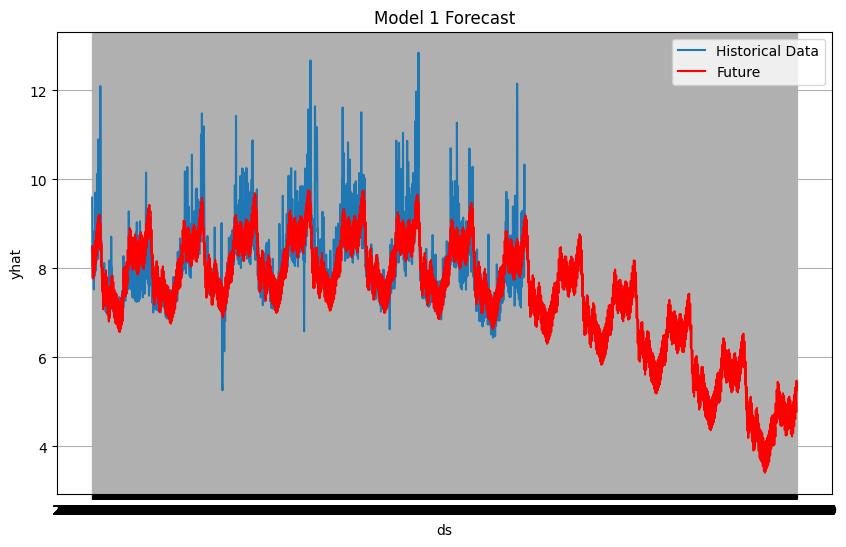

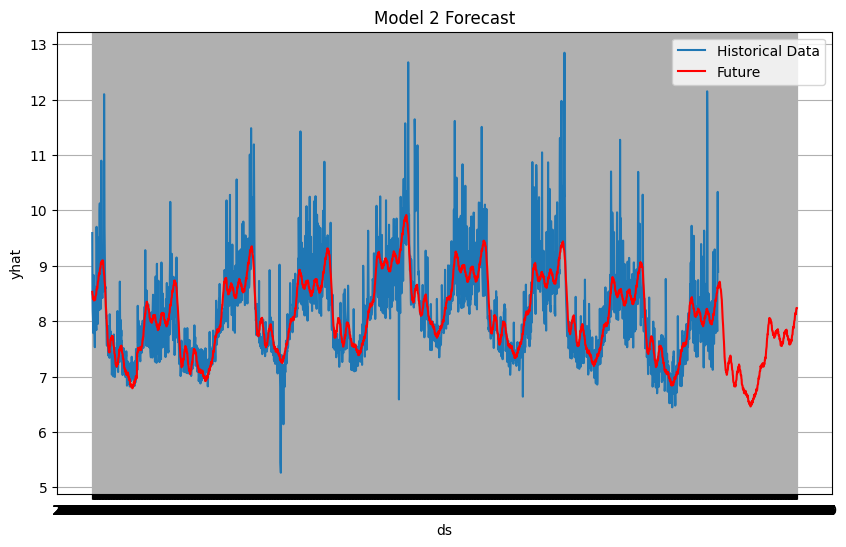

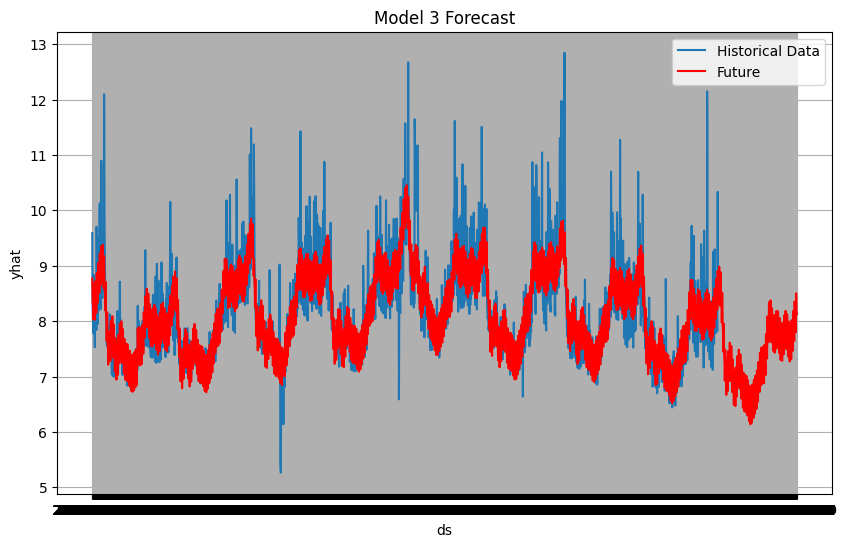

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# Initialize an empty dictionary to store models and their predictions
models = {}

# Model 1
# Add a 'cap' column to the DataFrame with the capacity values
df['cap'] = 8.5  # Assuming a capacity value of 8.5

# Initialize the Prophet model with growth='logistic'
m1 = Prophet(growth='logistic')

# Fit the model to the data
m1.fit(df)

# Generate future dates for forecasting
future1 = m1.make_future_dataframe(periods=1826)

# Set the 'cap' column in the future dataframe
future1['cap'] = 8.5

# Make predictions
fcst1 = m1.predict(future1)

# Store the model and its predictions in the dictionary
models['Model 1'] = {'model': m1, 'predictions': fcst1}

# Model 2
m2 = Prophet()
m2.add_seasonality(name='weekly', period=10, fourier_order=5)
m2.fit(df)

# Make a future dataframe and predict
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

# Store the model and its predictions in the dictionary
models['Model 2'] = {'model': m2, 'predictions': forecast2}

# Model 3
# Tune the ‘n_changepoints’ and ‘changepoit_prior_scale’ arguments/parameters.
m3 = Prophet(n_changepoints=25, changepoint_prior_scale=0.5)
m3.fit(df)
future3 = m3.make_future_dataframe(periods=365)
forecast3 = m3.predict(future3)

# Store the model and its predictions in the dictionary
models['Model 3'] = {'model': m3, 'predictions': forecast3}

# Plotting historical data and future forecast for each model
for model_name, model_info in models.items():
    # Extracting historical data and future forecast
    model = model_info['model']
    future = model_info['predictions']
    historical_data = df.copy()

    # Convert datetime column to string
    future['ds'] = future['ds'].dt.strftime('%Y-%m-%d')

    # Plotting historical data and future forecast
    plt.figure(figsize=(10, 6))
    plt.plot(historical_data['ds'], historical_data['y'], label='Historical Data')
    plt.plot(future['ds'], future['yhat'], label='Future', color='red')
    plt.xlabel('ds')
    plt.ylabel('yhat')
    plt.title(f"{model_name} Forecast")
    plt.legend()
    plt.grid(True)
    plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/q5knhrys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz680pjwd/y786t8_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20829', 'data', 'file=/tmp/tmpz680pjwd/q5knhrys.json', 'init=/tmp/tmpz680pjwd/y786t8_6.json', 'output', 'file=/tmp/tmpz680pjwd/prophet_modelh8v8kkpw/prophet_model-20240506043139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run p

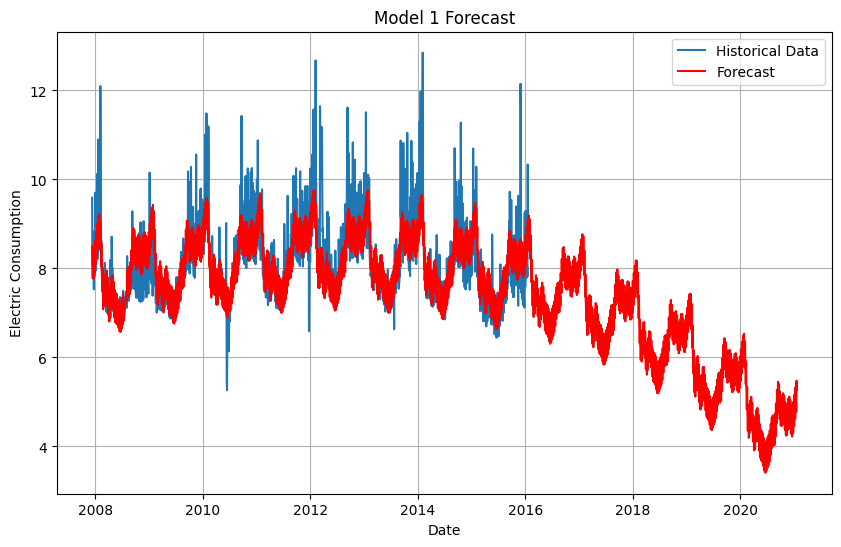

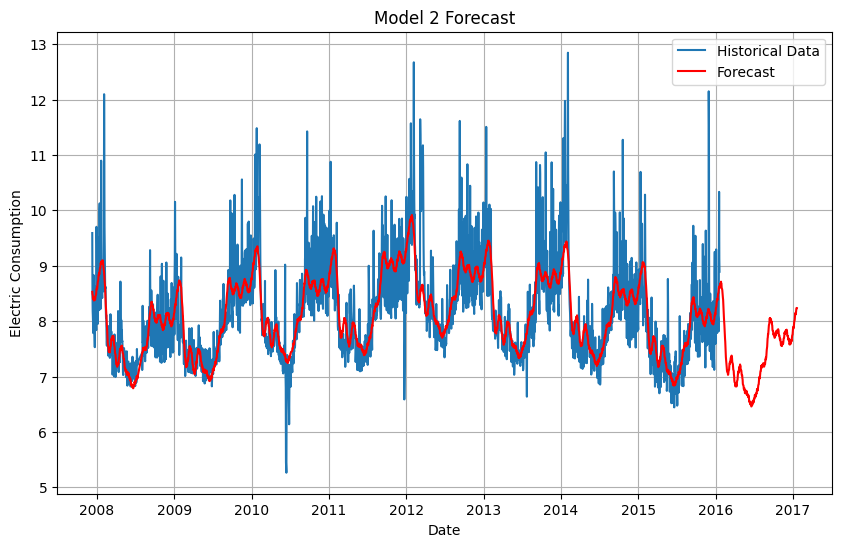

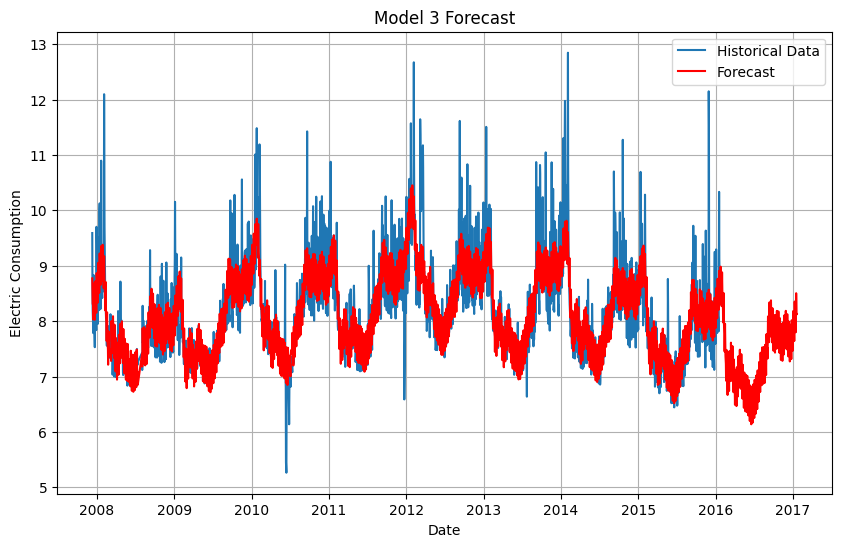

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# Convert 'ds' column to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Initialize an empty dictionary to store models and their predictions
models = {}

# Model 1
# Add a 'cap' column to the DataFrame with the capacity values
df['cap'] = 8.5  # Assuming a capacity value of 8.5

# Initialize the Prophet model with growth='logistic'
m1 = Prophet(growth='logistic')

# Fit the model to the data
m1.fit(df)

# Generate future dates for forecasting
future1 = m1.make_future_dataframe(periods=1826)

# Set the 'cap' column in the future dataframe
future1['cap'] = 8.5

# Make predictions
fcst1 = m1.predict(future1)

# Store the model and its predictions in the dictionary
models['Model 1'] = {'model': m1, 'predictions': fcst1}

# Model 2
m2 = Prophet()
m2.add_seasonality(name='weekly', period=10, fourier_order=5)
m2.fit(df)

# Make a future dataframe and predict
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

# Store the model and its predictions in the dictionary
models['Model 2'] = {'model': m2, 'predictions': forecast2}

# Model 3
# Tune the ‘n_changepoints’ and ‘changepoit_prior_scale’ arguments/parameters.
m3 = Prophet(n_changepoints=25, changepoint_prior_scale=0.5)
m3.fit(df)
future3 = m3.make_future_dataframe(periods=365)
forecast3 = m3.predict(future3)

# Store the model and its predictions in the dictionary
models['Model 3'] = {'model': m3, 'predictions': forecast3}

# Plotting historical data and future forecast for each model
for model_name, model_info in models.items():
    # Extracting historical data and future forecast
    model = model_info['model']
    future = model_info['predictions']
    historical_data = df.copy()

    # Plotting historical data and future forecast
    plt.figure(figsize=(10, 6))
    plt.plot(historical_data['ds'], historical_data['y'], label='Historical Data')
    plt.plot(future['ds'], future['yhat'], label='Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('Electric Consumption')
    plt.title(f"{model_name} Forecast")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import numpy as np
!pip install scikit-learn
from sklearn.metrics import r2_score

# Calculate and print the evaluation metrics for each model
for model_name, model_info in models.items():
    model = model_info['model']
    predictions = model_info['predictions']

    # Extract true values and predicted values
    y_true = df['y']
    y_pred = predictions['yhat']

    # Ensure consistent lengths of y_true and y_pred
    if len(y_true) != len(y_pred):
        min_len = min(len(y_true), len(y_pred))
        y_true = y_true[:min_len]
        y_pred = y_pred[:min_len]

    # Calculate evaluation metrics
    mae = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"R^2: {r2}")


Model: Model 1
MAE: 0.36578465265771154
MAPE: 4.339931468751579
R^2: 0.6043031185626706
Model: Model 2
MAE: 0.3575768345417165
MAPE: 4.230435487093051
R^2: 0.6222984015284503
Model: Model 3
MAE: 0.32281526762698304
MAPE: 3.8428214476442966
R^2: 0.7012522513449693
